# In this notebook, I'm going to demonstrate some of the capabilities of the package prophet.

### The prophet package in Python, developed by Facebook, is used for forecasting time series data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [6]:
df = pd.read_csv("/home/yair/Documents/Bar-Ilan/third-year/semester2/applied-statistics/my_work/prophet/1_Daily_minimum_temps.csv")
df.head()

          Date  Temp
2300  04/21/87   8.1
2301  04/22/87   7.8
2302  04/23/87  10.6
2303  04/24/87   9.1
2304  04/25/87     9
2305  04/26/87  11.9
2306  04/27/87  17.1
2307  04/28/87  16.8
2308  04/29/87  13.5
2309  04/30/87  11.6
2310  05/01/87     7
2311  05/02/87   9.7
2312  05/03/87   9.9
2313  05/04/87  11.2
2314  05/05/87  11.3
2315  05/06/87  11.8
2316  05/07/87   9.9
2317  05/08/87   7.1
2318  05/09/87   9.6
2319  05/10/87   9.8
2320  05/11/87  10.6
2321  05/12/87  12.8
2322  05/13/87  16.5
2323  05/14/87  11.7
2324  05/15/87  12.3
2325  05/16/87  12.2
2326  05/17/87  11.8
2327  05/18/87  10.7
2328  05/19/87  10.2
2329  05/20/87    10
2330  05/21/87   8.3
2331  05/22/87   6.6
2332  05/23/87   9.5
2333  05/24/87  12.3
2334  05/25/87   7.6
2335  05/26/87   9.3
2336  05/27/87     5
2337  05/28/87   4.3
2338  05/29/87   6.4
2339  05/30/87  10.8
2340  05/31/87   7.8
2341  06/01/87   8.5
2342  06/02/87   9.7
2343  06/03/87    10
2344  06/04/87    11
2345  06/05/87  10.2
2346  06/06/8

## This data set contains information about daily minimum temperatures from 1981 to 1990.

### Let's converate the data into something prophet can work with:

In [61]:
# Convert date column to datetime format
df['ds'] = pd.to_datetime(df['Date'], format='%m/%d/%y')  
df = df.drop(["Date"],axis = 1)

# Let's changed it to the best format according to prophet
df['ds'] = df['ds'].dt.strftime('%Y-%m-%d')

# Convert back to datetime format (Prophet requires datetime format)
df['ds'] = pd.to_datetime(df['ds'])

# Rename columns to fit Prophet's requirements
df = df.rename(columns={'Temp': 'y'})  

# Convert y column to numeric
df['y'] = pd.to_numeric(df['y'], errors='coerce')

df = df.dropna()



# Check the data types
print(df.dtypes)

y            float64
ds    datetime64[ns]
dtype: object


In [62]:
df.head()

,y,ds
0,20.7,1981-01-01
1,17.9,1981-01-02
2,18.8,1981-01-03
3,14.6,1981-01-04
4,15.8,1981-01-05


### Let's fit a prophet model on it to "predict the future".

In [63]:
model = Prophet()
model.fit(df)

15:28:26 - cmdstanpy - INFO - Chain [1] start processing
15:28:26 - cmdstanpy - INFO - Chain [1] done processing


In [64]:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

# Display the forecast with 'ds' and 'yhat'
forecast_summary = forecast[['ds', 'yhat']]
print(forecast_summary.tail())


             ds       yhat
4007 1991-12-27  14.482327
4008 1991-12-28  14.512218
4009 1991-12-29  14.471014
4010 1991-12-30  14.673133
4011 1991-12-31  14.856015


### We can try to plot our results:

/home/yair/.local/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/yair/.local/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


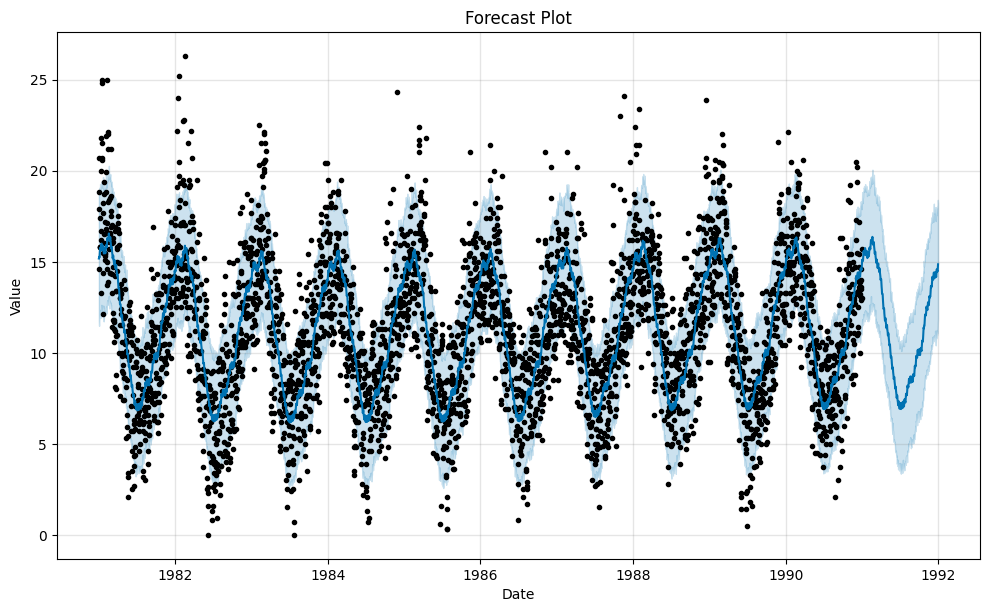

In [65]:
fig = model.plot(forecast)

plt.title('Forecast Plot')
plt.xlabel('Date')
plt.ylabel('Value')

# Show the plot
plt.show()


### We can take a look at our results component wise (e.g: in weeks).

/home/yair/.local/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/yair/.local/lib/python3.10/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/yair/.local/lib/python3.10/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavi

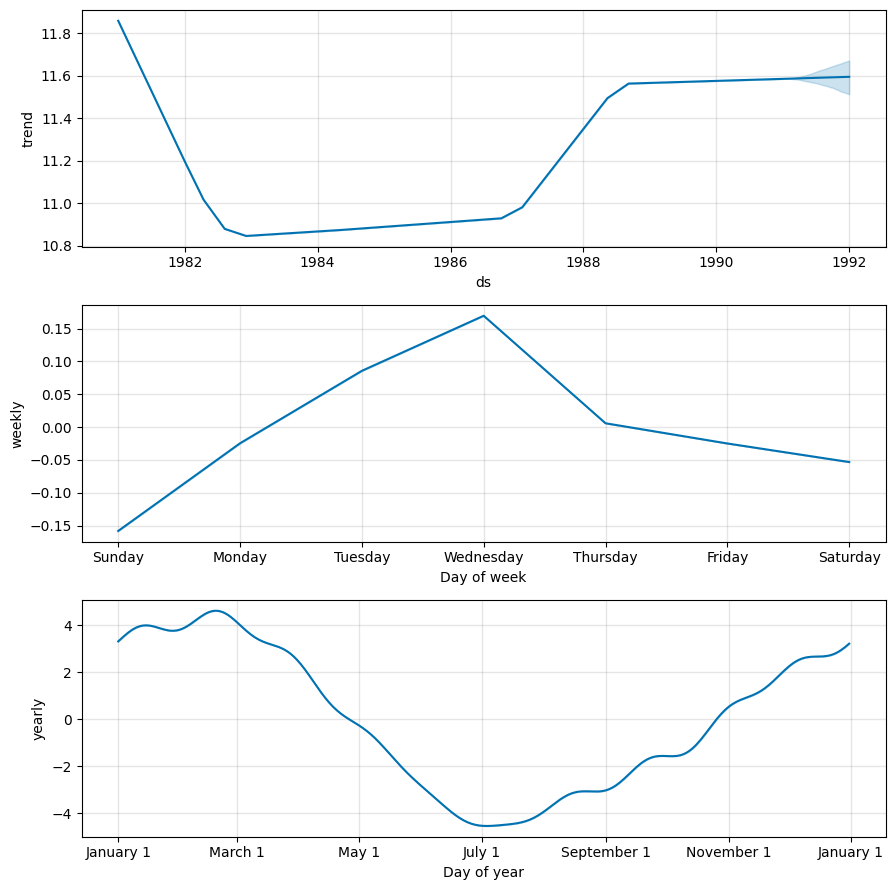

In [72]:
model.plot_components(forecast)
plt.show()

#### Altough it seems that the graph for the days make no sense, because it showed that wednesday have higher temprture on avarege, we can see that the only difference is about 0.15, so this graph doesn't reflect the fact the the change is acutally pretty small.
#### Another thing we can notice, is the temprature is the lowest on july, which seems like a mistake since it's the middle of summer. but, We notice that the temprature was being modeled in the second part of the globe, where winter accurs in july.

### If we want, we can the add the component "holiday".

In [80]:
model = Prophet()
model.add_country_holidays(country_name='US')

model.fit(df)

# Create future DataFrame and make predictions
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

15:58:02 - cmdstanpy - INFO - Chain [1] start processing
15:58:02 - cmdstanpy - INFO - Chain [1] done processing


,y,ds
0,20.7,1981-01-01
1,17.9,1981-01-02
2,18.8,1981-01-03
3,14.6,1981-01-04
4,15.8,1981-01-05


/home/yair/.local/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/yair/.local/lib/python3.10/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/yair/.local/lib/python3.10/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavi

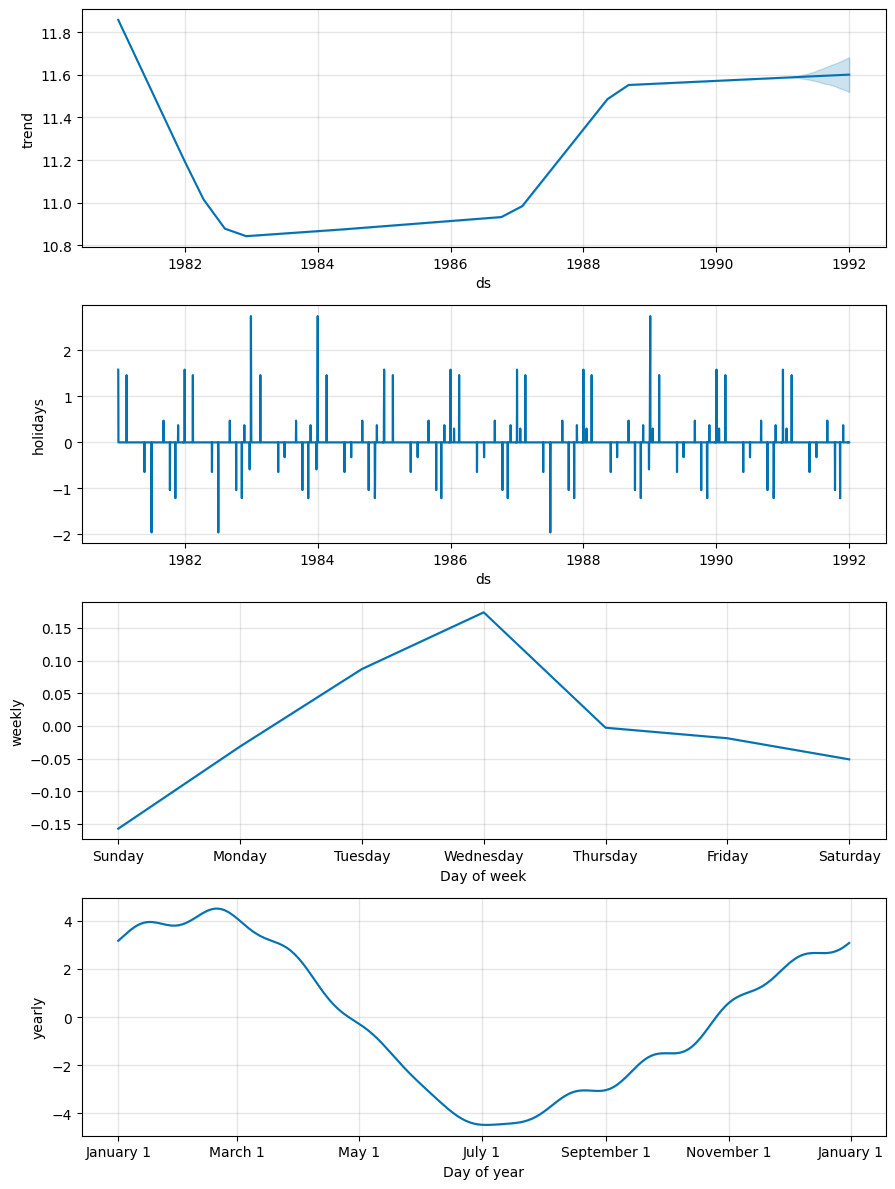

In [79]:
fig2 = model.plot_components(forecast)
plt.show()

### We can even add our own custom holiday if we want:

In [82]:
holidays = pd.DataFrame({
    'holiday': ['random_holiday', 'random_holiday', 'random_holiday', 'random_holiday', 'random_holiday'],
    'ds': pd.to_datetime(['2010-07-04', '2011-07-04', '2012-07-04', '2013-07-04', '2014-07-04']),
    'lower_window': [0, 0, 0, 0, 0],  # Days before the holiday
    'upper_window': [1, 1, 1, 1, 1]   # Days after the holiday
})

In [90]:
model = Prophet(holidays=holidays)
model.add_country_holidays(country_name='US')


model.fit(df)

future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

16:06:27 - cmdstanpy - INFO - Chain [1] start processing
16:06:28 - cmdstanpy - INFO - Chain [1] done processing


#### And plotting:

/home/yair/.local/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/yair/.local/lib/python3.10/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/yair/.local/lib/python3.10/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavi

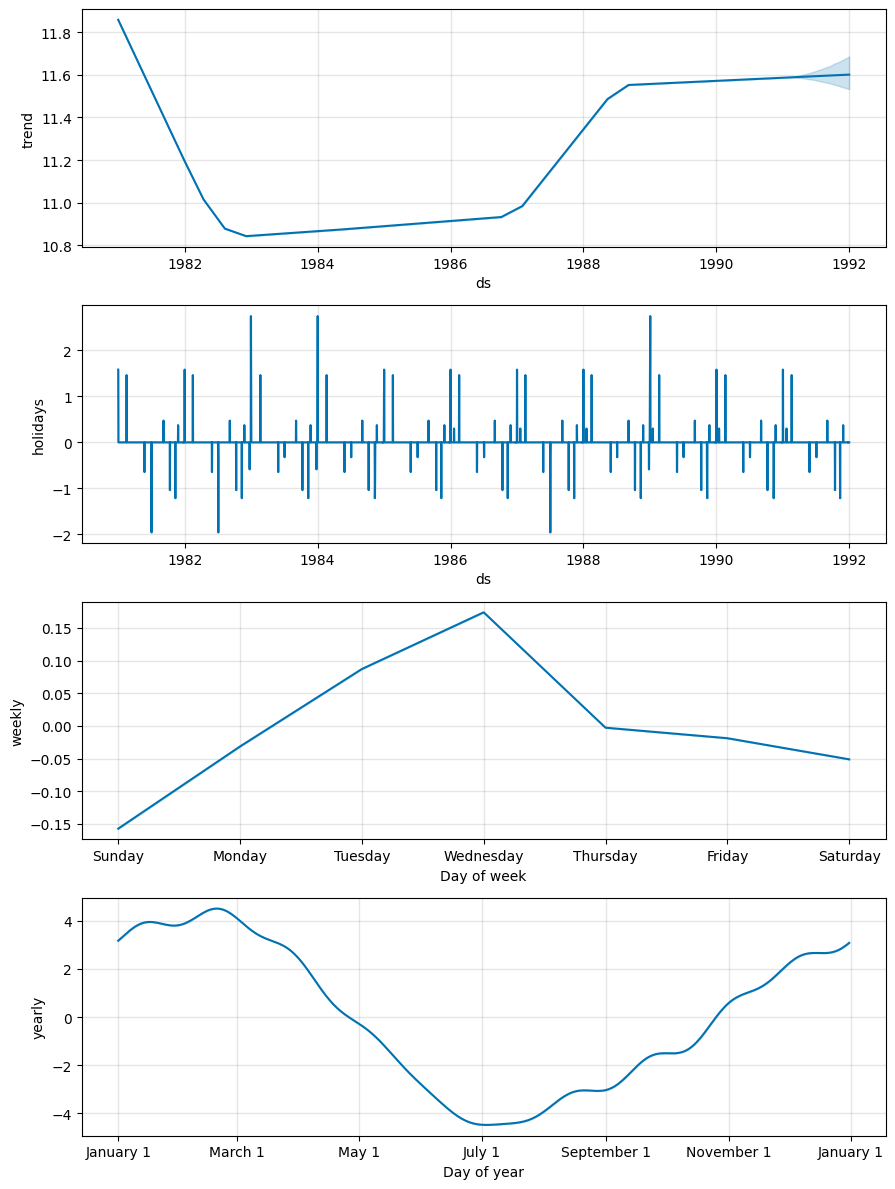

In [91]:
fig = model.plot_components(forecast)
plt.show()

### We can use the bayesian approach in fitting our model, by MCMC, which can provide more insights into the uncertainty of the model parameters.

In [92]:
model = Prophet(mcmc_samples=300)

model.fit(df)

16:13:17 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

16:15:17 - cmdstanpy - INFO - CmdStan done processing.
16:15:17 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: norma

/home/yair/.local/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/yair/.local/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


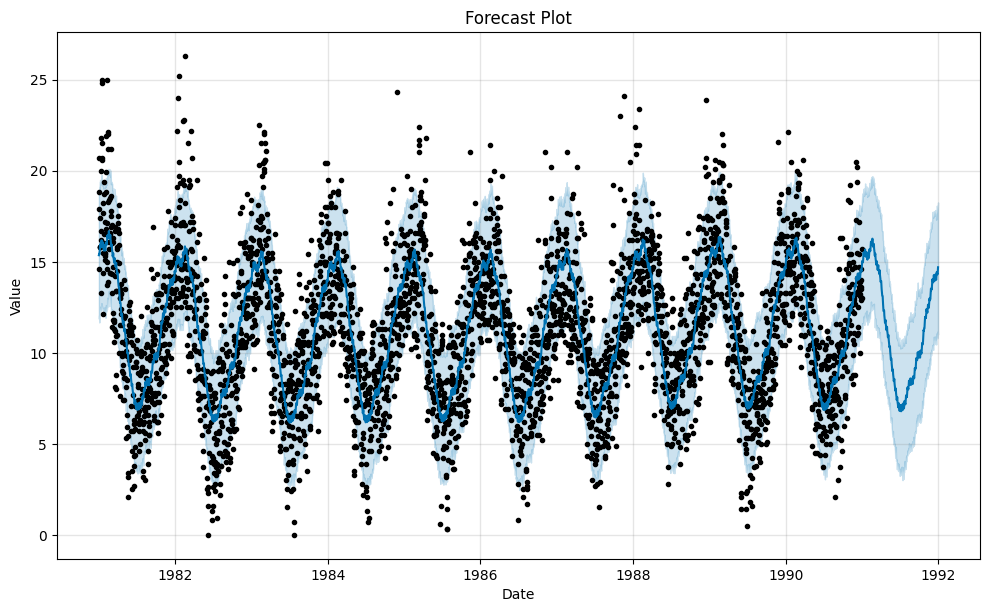

/home/yair/.local/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/yair/.local/lib/python3.10/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/yair/.local/lib/python3.10/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavi

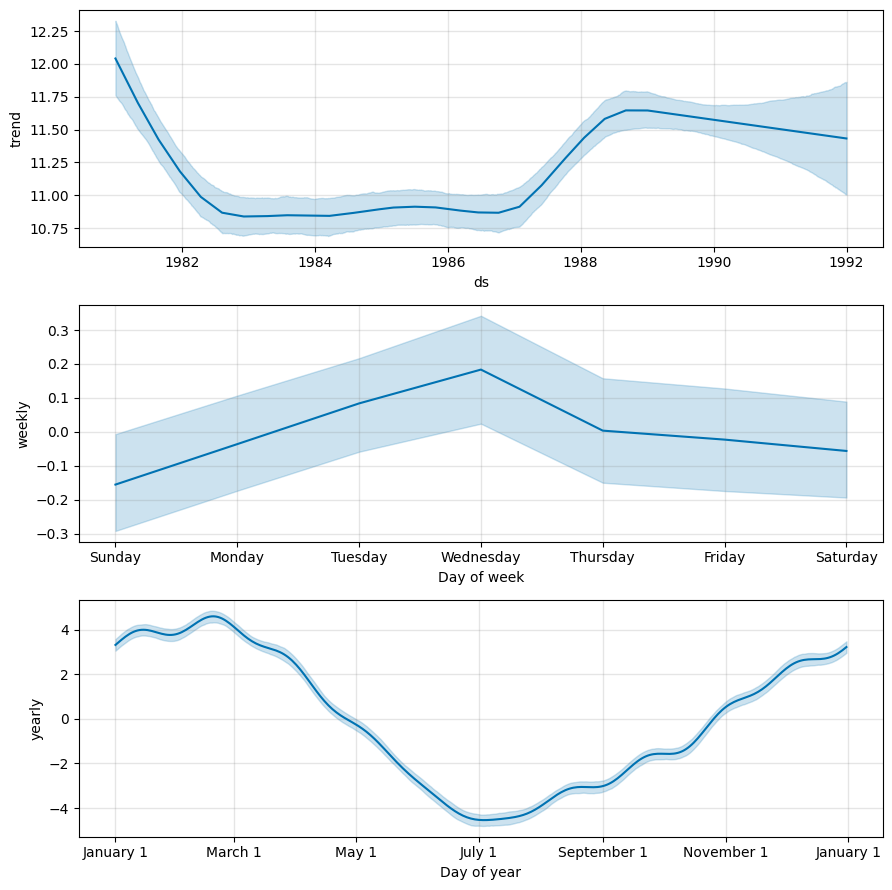

In [93]:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

# forecast
fig = model.plot(forecast)
plt.title('Forecast Plot')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

# components
fig = model.plot_components(forecast)
plt.show()

#### By using MCMC, insead of geting a single best estimate of the parameters, we get a range of parameter values from the posterior distribution. 


### Another way to to try to better our forcast is by "seasonality_mode". 
#### With this method, we can specify how seasonality is modeled, and it fits cases where series data where the seasonal effects are not constant but scale with the level of the trend.

17:30:04 - cmdstanpy - INFO - Chain [1] start processing
17:30:04 - cmdstanpy - INFO - Chain [1] done processing
/home/yair/.local/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/yair/.local/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


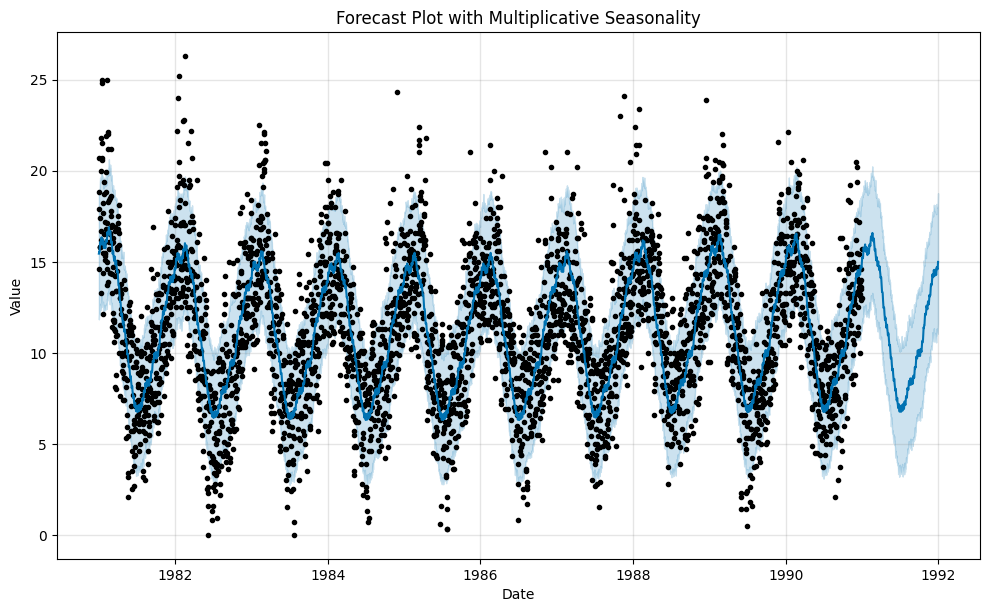

In [95]:
model = Prophet(seasonality_mode="multiplicative")

model.fit(df)

future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

fig = model.plot(forecast)
plt.title('Forecast Plot with Multiplicative Seasonality')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

### Like any other type of data training, prophet has the ability to do cross validation.
#### We can asses our success using perfomance metrics.

In [97]:
from prophet.diagnostics import cross_validation, performance_metrics

df_cv = cross_validation(
    model,
    initial='730 days',   # Initial training period
    period='180 days',    # Period for re-training
    horizon='365 days'    # Forecast horizon
)

# Calculate performance metrics
df_pmetrics = performance_metrics(df_cv,)
print(df_pmetrics)


  0%|          | 0/15 [00:00<?, ?it/s]

17:37:26 - cmdstanpy - INFO - Chain [1] start processing
17:37:26 - cmdstanpy - INFO - Chain [1] done processing
17:37:26 - cmdstanpy - INFO - Chain [1] start processing
17:37:26 - cmdstanpy - INFO - Chain [1] done processing
17:37:27 - cmdstanpy - INFO - Chain [1] start processing
17:37:27 - cmdstanpy - INFO - Chain [1] done processing
17:37:27 - cmdstanpy - INFO - Chain [1] start processing
17:37:27 - cmdstanpy - INFO - Chain [1] done processing
17:37:27 - cmdstanpy - INFO - Chain [1] start processing
17:37:27 - cmdstanpy - INFO - Chain [1] done processing
17:37:27 - cmdstanpy - INFO - Chain [1] start processing
17:37:27 - cmdstanpy - INFO - Chain [1] done processing
17:37:28 - cmdstanpy - INFO - Chain [1] start processing
17:37:28 - cmdstanpy - INFO - Chain [1] done processing
17:37:28 - cmdstanpy - INFO - Chain [1] start processing
17:37:28 - cmdstanpy - INFO - Chain [1] done processing
17:37:28 - cmdstanpy - INFO - Chain [1] start processing
17:37:28 - cmdstanpy - INFO - Chain [1]

     horizon       mse      rmse       mae     mdape     smape  coverage
0    37 days  7.784285  2.790033  2.151260  0.159214  0.209805  0.798168
1    38 days  7.605989  2.757896  2.131934  0.159980  0.207826  0.803297
2    39 days  7.398159  2.719956  2.103668  0.158117  0.204731  0.809890
3    40 days  7.346177  2.710383  2.098845  0.157642  0.204217  0.809158
4    41 days  7.414336  2.722928  2.110755  0.158662  0.205448  0.806227
..       ...       ...       ...       ...       ...       ...       ...
324 361 days  7.605479  2.757803  2.178207  0.176865  0.241918  0.807326
325 362 days  7.736300  2.781421  2.187218  0.176865  0.243567  0.802564
326 363 days  7.731041  2.780475  2.192581  0.178893  0.243779  0.803297
327 364 days  7.638148  2.763720  2.181073  0.177436  0.241007  0.805861
328 365 days  7.430020  2.725806  2.150293  0.175852  0.235997  0.808791

[329 rows x 7 columns]


### We can plot our result, for example: rmse (Root Mean Squared Error).

/home/yair/.local/lib/python3.10/site-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/home/yair/.local/lib/python3.10/site-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


<Figure size 1000x600 with 0 Axes>

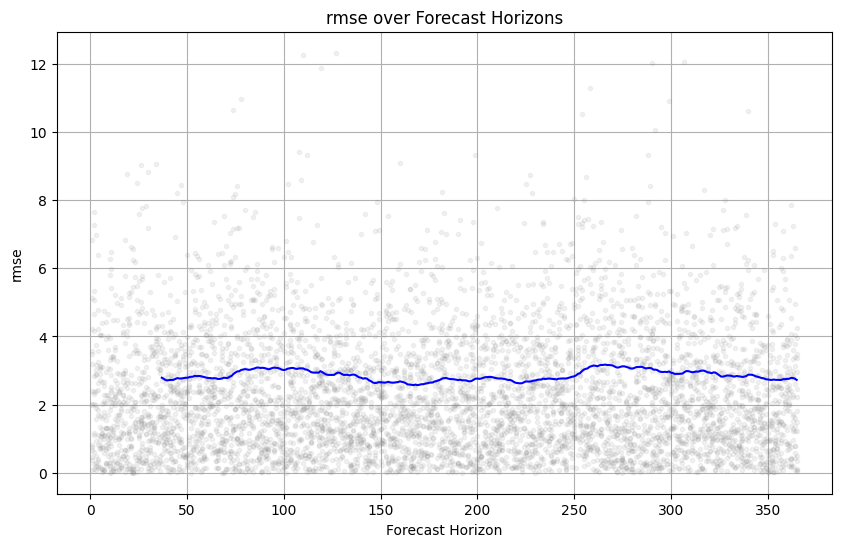

In [105]:
from prophet.plot import plot_cross_validation_metric

plt.figure(figsize=(10, 6))
plot_cross_validation_metric(df_cv, metric="rmse")
plt.title('rmse over Forecast Horizons')
plt.xlabel('Forecast Horizon')
plt.ylabel('rmse')
plt.grid(True)
plt.show()

### since our metric is pretty much the same across all validation sets, we can assume that our model is generalizes well and is not overly sensitive to specific time periods or folds.